# LABORATORY 10- Electrocardiography

## PURPOSE
Electrocardiography is the study of the electrical activity of the heart.  Cardiac muscle cells are the sources of this electrical activity. Electrocardiograms are graphical records that measure the change in the electrical activity of the heart.

## METHODS
1. get computer laptop in lab and open Labscrib3 
2. hook up the EKG machine to labtop computer
    - IWX/214 unit needs to be plugged in and connected by USB port
    - C-AAMI-504 EEG cable inserted to Channel 1 and 2
    - turn on labtop
3. Under "Settings" open ECG-HeartSounds
4. Remove the disposable ECG electrodes from its envelope and snap the lead wires onto the electrodes while the electrodes are still on the plastic shield. Insutruct the subject to remove all jewelry from their wrists and ankles.  Use an alcohol swab to clean a region of skin on the subject right wrist and the inside of both ankles. Let area dry
5. Apply the black electrode to right wrist, red electrode to left ankle, the green electode to the right ankle
6. Instruct the subject to sit quietly with their hands on their lap. If the subject moves, the ECG trace will move off the top or bottom of the screen. If the subject moves any muscles in the arms or upper body, electromyograms (EMGs) from the muscles will appear on the ECG recording as noise
7. Click record button. The signal should begin scrolling across the screen.  If the ECG appears upside down in Lead II, click on the upside down triangle on the left and click invert
8. Record for approximately 1 minute


## RESULTS

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Import data

In [2]:
data = pd.read_csv (r'./lab10.txt', sep = '\t') 
data

,Time,Lead II
0,0.000,0.000000
1,0.005,0.000000
2,0.010,0.000000
3,0.015,0.000000
4,0.020,0.000000
...,...,...
8432,42.160,0.002248
8433,42.165,0.030159
8434,42.170,0.040632
8435,42.175,0.026908


## Visualize data

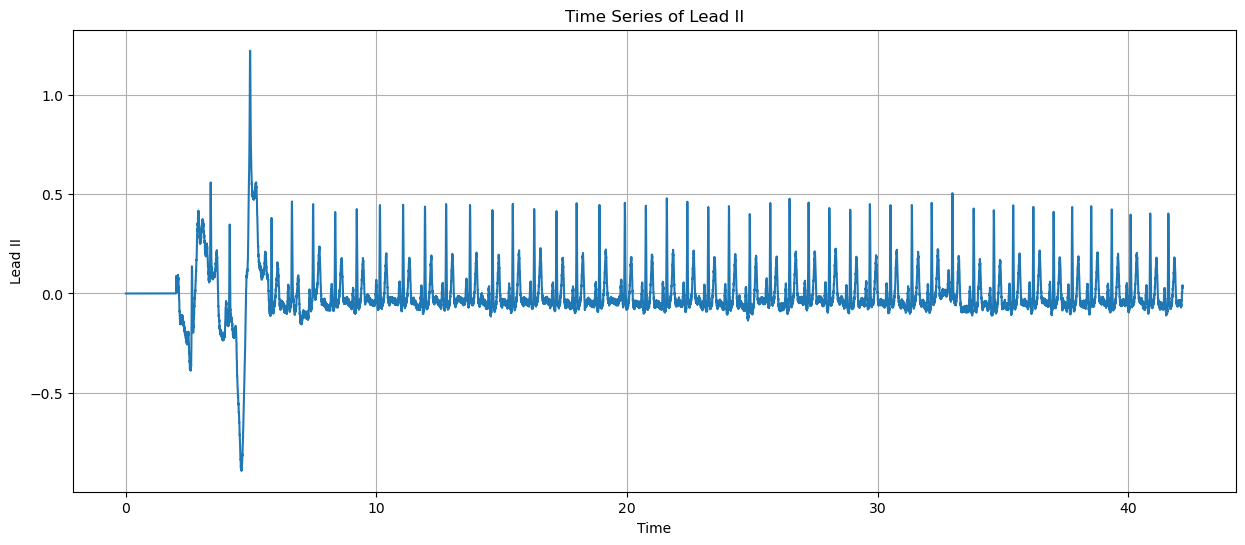

In [3]:
df = pd.DataFrame(data)

# Plot the data to visually inspect
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('Time Series of Lead II')
plt.grid(True)
plt.show()

## Find the R waves

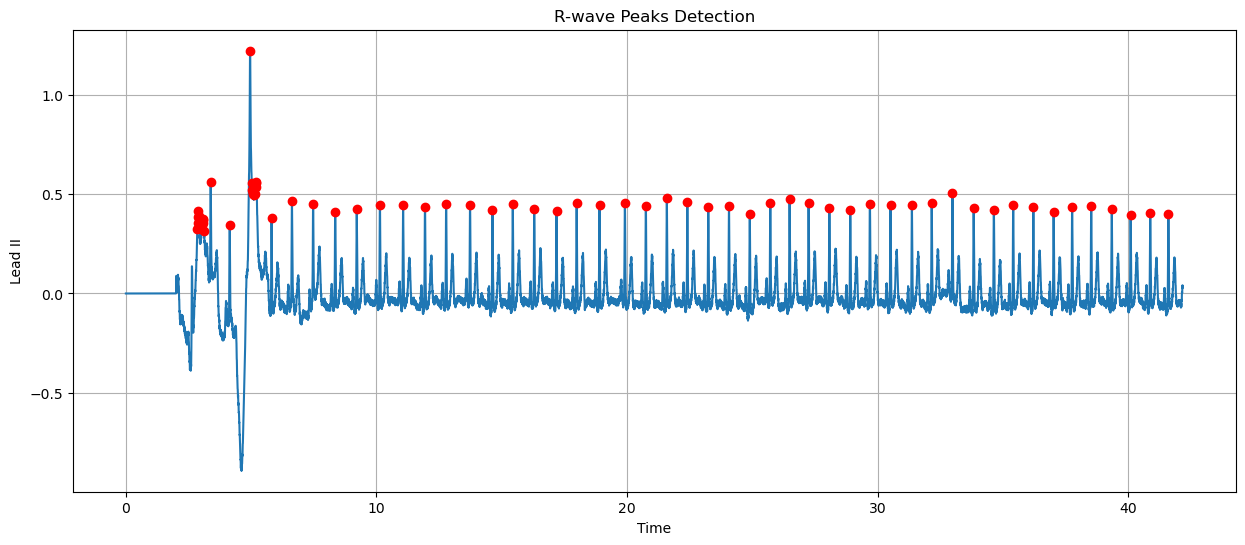

In [4]:
# Detect R-wave peaks
peak_indices, _ = find_peaks(df['Lead II'], height=.3)  # You might need to adjust parameters like distance, height, etc.
# Plot the data with detected peaks
plt.figure(figsize=(15, 6))
plt.plot(df['Time'], df['Lead II'])
plt.plot(df['Time'].iloc[peak_indices], df['Lead II'].iloc[peak_indices], 'ro')
plt.xlabel('Time')
plt.ylabel('Lead II')
plt.title('R-wave Peaks Detection')
plt.grid(True)
plt.show()

## Determine HR

In [5]:
# Calculate RR intervals
rr_intervals = df['Time'].iloc[peak_indices].diff().dropna().values

# Calculate heart rate in BPM
average_rr_interval = rr_intervals.mean()
heart_rate = 60 / average_rr_interval

print(f"Average RR interval: {average_rr_interval:.2f} seconds")
print(f"Heart rate: {heart_rate:.2f} BPM")

Average RR interval: 0.55 seconds
Heart rate: 109.91 BPM


In [9]:
## Label P, R, and T waves

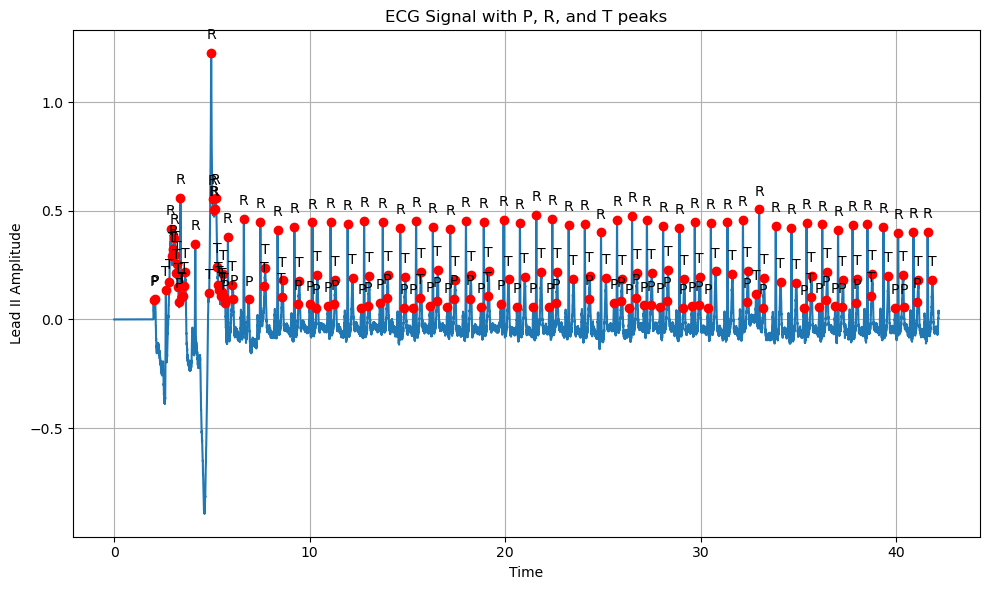

In [6]:
# Detect all peaks without amplitude restriction
peaks, _ = find_peaks(df['Lead II'], distance=10, height=0.05) #Distance and height will need to change depending upon your data

# Classify peaks based on their amplitude
def classify_peak(amp):
    if amp > 0.3: #This height will depend on your data
        return 'R'
    elif 0.1 <= amp <= 0.3: #This height will depend on your data
        return 'T'
    else: 
        return 'P'

labels = [classify_peak(df['Lead II'][peak]) for peak in peaks]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Lead II'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['Lead II'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['Lead II'][peak]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.xlabel('Time')
plt.ylabel('Lead II Amplitude')
plt.title('ECG Signal with P, R, and T peaks')
plt.grid(True)
plt.tight_layout()
plt.show()

## View a specific time window

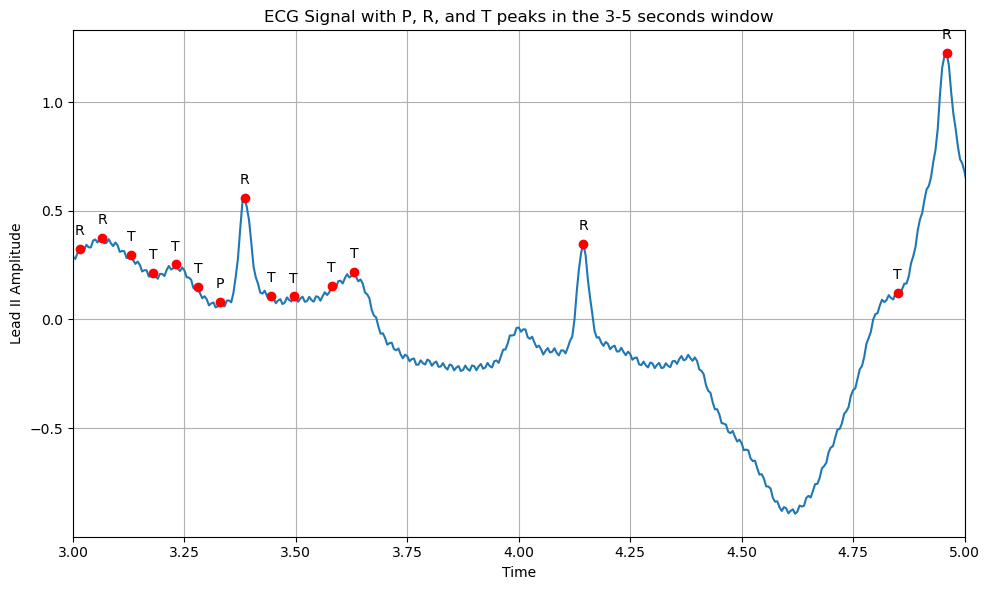

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Lead II'], label='ECG Signal')

# Annotate each peak based on its label
for peak, label in zip(peaks, labels):
    plt.plot(df['Time'][peak], df['Lead II'][peak], "ro")
    plt.annotate(label, (df['Time'][peak], df['Lead II'][peak]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.xlabel('Time')
plt.ylabel('Lead II Amplitude')
plt.title('ECG Signal with P, R, and T peaks in the 3-5 seconds window')
plt.grid(True)

# Set x-axis limits to zoom into the 3-5 seconds time window
plt.xlim(3, 5)

plt.tight_layout()
plt.show()

## DISCUSSION
ECG spikes when subject is not sitting still

## CONCLUSION
ECG records electric activity of the heart of the subject being tested